# Dynamic Code 

Code that asks user to input the image and model predicts the landmarks and plot it on original image itself

In [8]:
#load all the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from math import sin, cos, pi
import tensorflow as tf
from keras.applications import MobileNet
from keras.layers import Conv2D, LeakyReLU, GlobalAveragePooling2D, Dropout, Dense
from keras.models import Sequential


from keras.layers import Activation,Convolution2D,MaxPooling2D,BatchNormalization,Flatten,Dense,Dropout,Conv2D,MaxPool2D,ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU


from scipy.ndimage import rotate
from matplotlib.patches import Circle

Model_Architecture

In [9]:
def Model_Architecture():
    
    model = Sequential()

    # Input dimensions: (None, 96, 96, 1)
    model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,3)))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    # Input dimensions: (None, 96, 96, 32)
    model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))

    # Input dimensions: (None, 48, 48, 32)
    model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    # Input dimensions: (None, 48, 48, 64)
    model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))

    # Input dimensions: (None, 24, 24, 64)
    model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    # Input dimensions: (None, 24, 24, 96)
    model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))

    # Input dimensions: (None, 12, 12, 96)
    model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    # Input dimensions: (None, 12, 12, 128)
    model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))

    # Input dimensions: (None, 6, 6, 256)
    model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    # Input dimensions: (None, 6, 6, 256)
    model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2, 2)))

    # Input dimensions: (None, 3, 3, 512)
    model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())
    # Input dimensions: (None, 3, 3, 512)
    model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
    model.add(LeakyReLU(alpha = 0.1))
    model.add(BatchNormalization())

    # Input dimensions: (None, 3, 3, 512)
    model.add(Flatten())
    model.add(Dense(512,activation='linear'))
    model.add(Dropout(0.1))
    model.add(Dense(162))
    
    
    model.load_weights('81pnt_crop_cnn/cp-210.pkl')
    
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
    
    return model 

In [10]:
def Model_Output(Model):
    image_path = input("Enter Image Filename:") # ask user to enter path of image file
    test_image = cv2.imread(image_path)
    
    original_img = plt.imread(image_path)
    fig,ax = plt.subplots(1)
    ax.set_aspect('equal')
    ax.imshow(original_img)

    
    gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    # Draw rectangle around the faces and crop the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 0, 255), 2)
        faces = test_image[y:y + h, x:x + w]
    #         cv2.imshow("face",faces)
        cv2.imwrite(("crop.jpg"),faces)

    test_image = cv2.imread("crop.jpg")
    test_image = cv2.resize(test_image,(96,96))
    cv2.imwrite('final_test_2.jpg',test_image)
    images = np.array(test_image)/255.0
    testt=np.expand_dims(images,axis=0)

    ans = model.predict(testt)

    ans = ans * 96
    #print("Answer_Landmarks:", ans)
    counter = 0
    test_x = []
    test_y = []
    for i in abs(ans[0]):
        if counter%2==0:
            test_x.append(i)
        else:
            test_y.append(i)

        counter = counter+1
        
    img = plt.imread('final_test_2.jpg')
    fig,ax = plt.subplots(1)
    ax.set_aspect('equal')
    ax.imshow(img)

    for xx,yy in zip(test_x,test_y):
        circ = Circle((xx,yy),1)
        ax.add_patch(circ)

    # Show the image
    plt.show()
    
    return ans

In [11]:
model = Model_Architecture() 

Enter Image Filename:test_images/d2.jpg


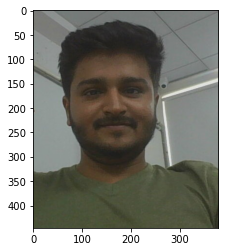

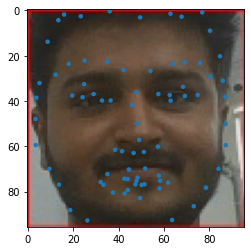

array([[ 3.7248437 , 38.496857  ,  3.3357675 , 47.881416  ,  3.4810517 ,
        59.410114  ,  9.479143  , 69.90392   , 13.706989  , 76.86466   ,
        18.649927  , 88.12973   , 26.217333  , 92.6968    , 35.967983  ,
        96.80209   , 44.892704  , 99.10347   , 57.011795  , 98.46732   ,
        63.659866  , 92.47946   , 73.183365  , 86.41655   , 78.62619   ,
        78.22406   , 84.141396  , 69.88359   , 87.34952   , 59.48623   ,
        87.270164  , 50.167294  , 87.23935   , 38.117523  , 12.235631  ,
        28.339233  , 18.008781  , 23.565649  , 25.041904  , 22.095617  ,
        35.076515  , 22.547028  , 42.19932   , 26.195854  , 54.071854  ,
        26.645214  , 63.96338   , 23.461554  , 69.20482   , 22.841852  ,
        75.95619   , 23.170456  , 80.53977   , 29.112373  , 47.803032  ,
        35.95845   , 46.029495  , 41.73453   , 48.121136  , 49.93508   ,
        49.105072  , 57.130096  , 38.479904  , 61.494034  , 41.548763  ,
        62.125202  , 46.65663   , 62.907425  , 51.1

In [12]:
Model_Output(Model_Architecture)